In [1]:
# Plik excercise zawiera wynik y i dane wejściowe x1, x2 dla 40 punktów danych, 
# z dalszymi 20 punktami z danymi wejściowymi, ale bez wyniku.

In [1]:
import pandas as pd

# Wczytanie pliku do dataframe'a
df = pd.read_csv("exercise.csv")
df


,y,x1,x2
0,15.68,6.87,14.09
1,6.18,4.40,4.35
2,18.10,0.43,18.09
3,9.07,2.73,8.65
4,17.97,3.25,17.68
5,10.04,5.30,8.53
6,20.74,7.08,19.50
7,9.76,9.73,0.72
8,8.23,4.51,6.88
9,6.52,6.40,1.26


In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

df_known = df[:40]
df_unknown = df[40:]

# Utworzenie modelu na podstawie znanych wartości y
model = smf.ols('y ~ x1+x2', data=df_known).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     652.4
Date:                Thu, 10 Dec 2020   Prob (F-statistic):           1.41e-29
Time:                        17:52:03   Log-Likelihood:                -50.985
No. Observations:                  40   AIC:                             108.0
Df Residuals:                      37   BIC:                             113.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3151      0.388      3.392      0.002       0.530       2.101
x1             0.5148      0.046     11.216      0.000       0.422       0.608
x2             0.8069      0.024     33.148      0.000       0.758       0.856
==============================================================================
Omnibus:                       14.478   Durbin-Watson:                   2.509
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.393
Skew:                           1.341   Prob(JB):                     0.000454
Kurtosis:                       4.428   Cond. No.                         38.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

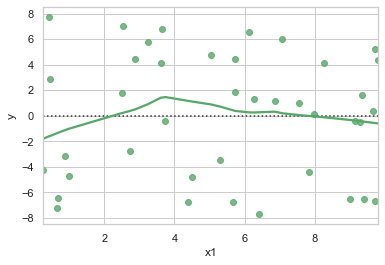

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
sns.residplot(x=df_known['x1'], y=df_known['y'], lowess=True, color="g")
plt.show()
# Z wykresu wynika, ze zalozenia zostaly spelnione.

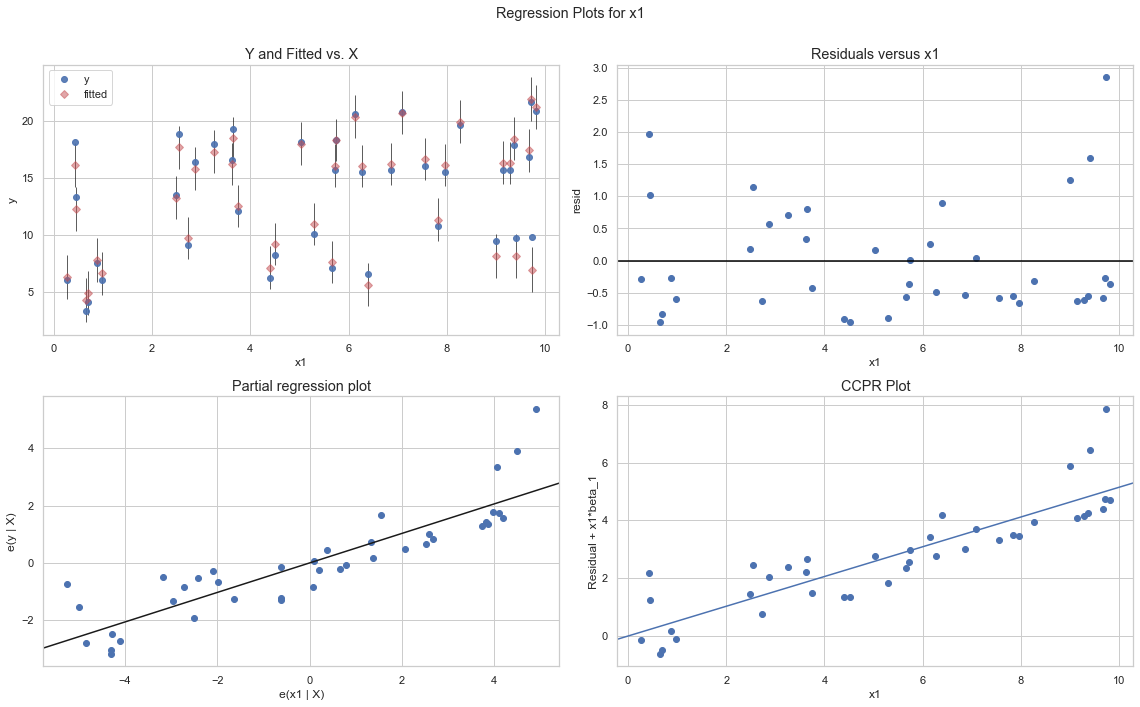

In [7]:
fig = plt.figure(figsize=(16,10))
fig = sm.graphics.plot_regress_exog(model, 'x1', fig=fig)

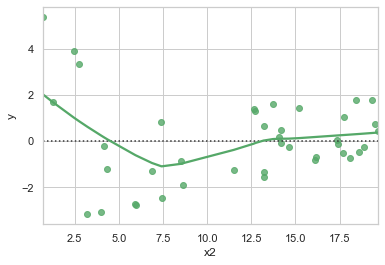

In [8]:
sns.set(style="whitegrid")
sns.residplot(x=df_known['x2'], y=df_known['y'], lowess=True, color="g")
plt.show()
# Z wykresu wynika, ze zalozenia zostaly spelnione.
# Model jest poprawny

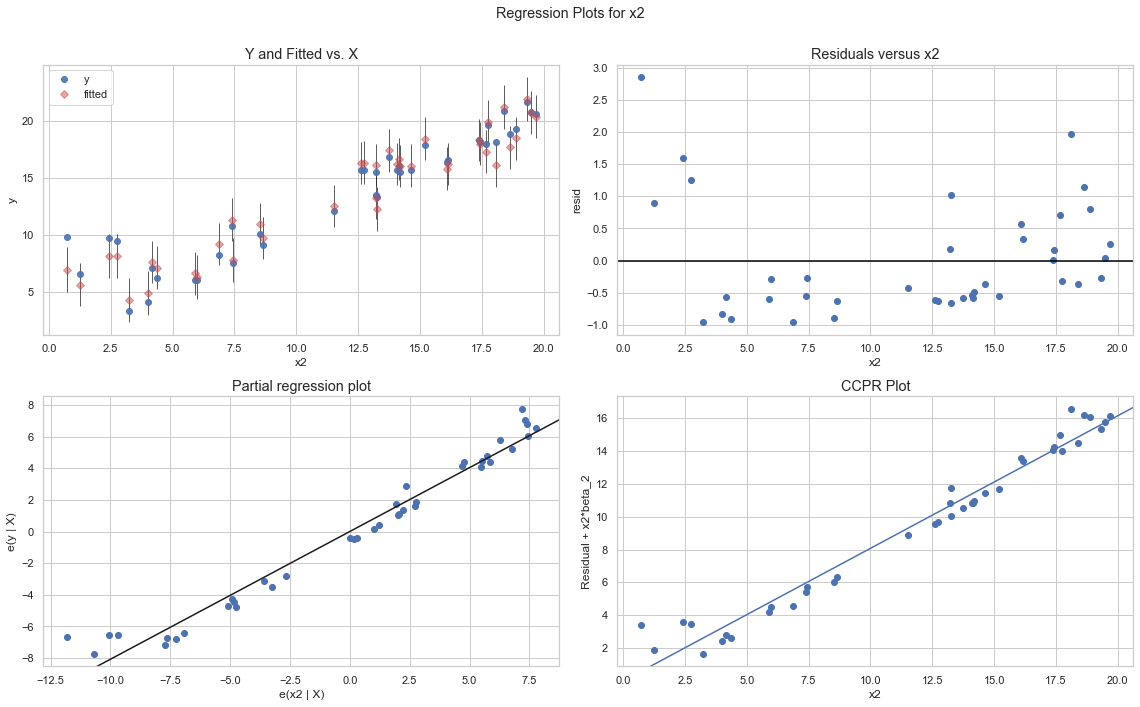

In [9]:
#create residual vs. predictor plot for 'x2'
fig = plt.figure(figsize=(16,10))
fig = sm.graphics.plot_regress_exog(model, 'x2', fig=fig)

In [93]:
# Ponizej zwizualizowano dane oryginalne i przewidywane
# w zaleznosci od dobranej formuly.



Text(0, 0.5, 'y')

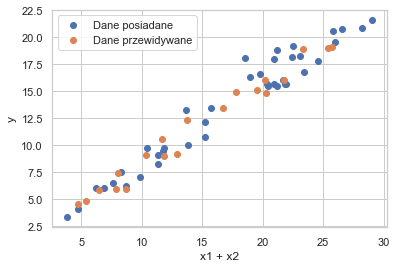

In [94]:
import matplotlib.pyplot as plt

# 'y ~ x1+x2'
intercept = 1.3151
x1_coef = 0.5148
x2_coef = 0.8069

predicted_y = intercept + x1_coef * df_unknown['x1'] + x2_coef * df_unknown['x2']

plt.scatter(df_known['x1'] + df_known['x2'], df_known['y'])
plt.scatter(df_unknown['x1'] + df_unknown['x2'], predicted_y )
plt.legend(['Dane posiadane', 'Dane przewidywane'])
# plt.grid()
plt.xlabel("x1 + x2")
plt.ylabel("y")

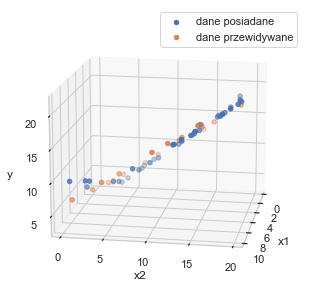

In [95]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(df_known['x1'], df_known['x2'], df_known['y'])
ax.scatter(df_unknown['x1'], df_unknown['x2'], predicted_y)
ax.view_init(15, 10)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.legend(['dane posiadane', 'dane przewidywane'])
plt.show()

# Dla formuly 'y ~ x1+x2' wartosci przewidywane znajduja sie we wspolnej plaszczyznie z danymi posiadanymi. 

Text(0, 0.5, 'y')

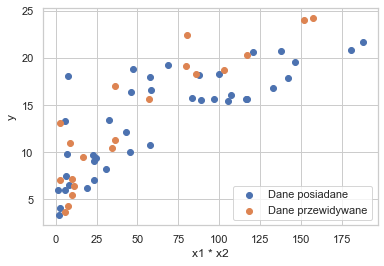

In [96]:
# 'y ~ x1*x2'
intercept = -0.917
x1_coef = 0.9117
x2_coef = 1.0216

predicted_y = intercept + x1_coef * df_unknown['x1'] + x2_coef * df_unknown['x2']

plt.scatter(df_known['x1'] * df_known['x2'], df_known['y'])
plt.scatter(df_unknown['x1'] * df_unknown['x2'], predicted_y )
plt.legend(['Dane posiadane', 'Dane przewidywane'])

plt.xlabel("x1 * x2")
plt.ylabel("y")
# plt.grid()

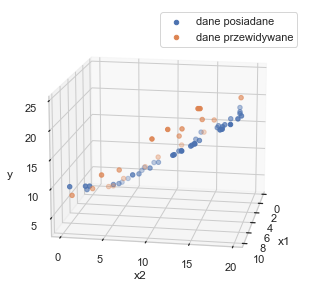

In [97]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(df_known['x1'], df_known['x2'], df_known['y'])
ax.scatter(df_unknown['x1'], df_unknown['x2'], predicted_y)
ax.view_init(15, 10)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.legend(['dane posiadane', 'dane przewidywane'])
plt.show()

# Formula 'y ~ x1*x2' sprawdzila sie gorzej niz 'y ~ x1+x2'.
# Przewidywane wartosci y znajduja sie ponad plaszczyzna danych posiadanych.